In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Task 2: Approximating linear vector fields

In [2]:
# Load x0 and print shape
x0 = np.loadtxt(fname="linear_vectorfield_data_x0.txt")
print('x0: '+str(np.shape(x0)))
# Load x1 and print shape
x1 = np.loadtxt(fname="linear_vectorfield_data_x1.txt")
print('x1: '+str(np.shape(x1)))

x0: (1000, 2)
x1: (1000, 2)


Visualization of the dataset

Text(0, 0.5, 'coordinate 2')

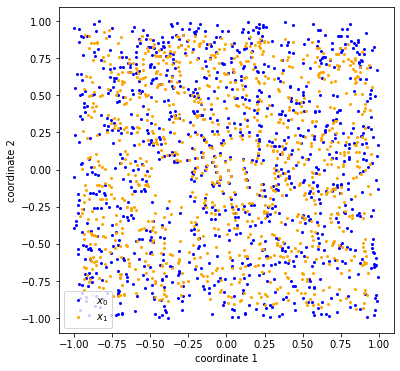

In [3]:
plt.figure(figsize=(6,6))
plt.plot(x0[:,0], x0[:,1],'bo', color='blue', linestyle=' ', markersize=2)
plt.plot(x1[:,0], x1[:,1],'o', color='orange', linestyle=' ', markersize=2)
plt.legend(['$x_0$', '$x_1$'])
plt.xlabel('coordinate 1')
plt.ylabel('coordinate 2')

Visualization of the vector field estimation

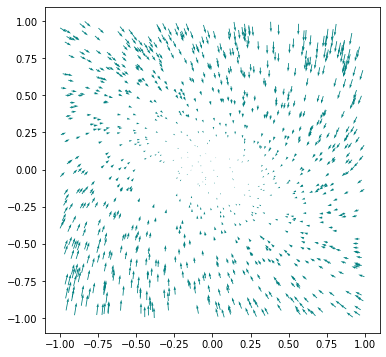

In [4]:
delta_t = 1
v_est = (x1 - x0) / delta_t
plt.figure(figsize=(6,6))
plt.quiver(x0[:,0], x0[:,1], v_est.T[0], v_est.T[1], color='teal')

Approximation of the matrix A and computation of the MSE

In [5]:
# compute A using closed form solution to minimize least squares error
A = np.linalg.lstsq(x0, v_est, rcond=None)[0]
print(A)

[[-0.04935524 -0.04638232]
 [ 0.02319115 -0.09573757]]


MSE: 0.001975851787073813


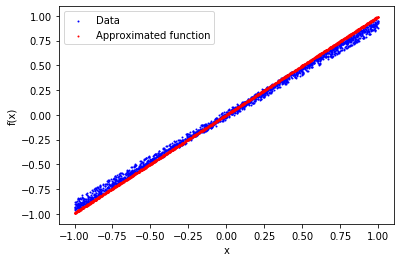

In [6]:
delta_t = 0.1
x1_est = delta_t * (x0 @ A) + x0 #formula: x1_est = delta_t * (x0 @ A)

# print mean squared error between data and approximated function values
MSE_A_lin = np.mean((x1_est - x1)**2)
print('MSE: %.18f' %(MSE_A_lin))

# plot function over data set
plt.scatter(x0, x1, c='blue', s=1, alpha=1, label='Data')
plt.scatter(x0, x1_est, c='red', s=1, alpha=1, label='Approximated function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

Visualization of the trajectory of the point (10, 10)

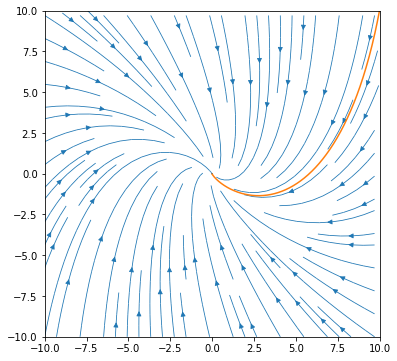

In [7]:
# create grid out of linearly spaced points from x and y arrays
x, y = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))

# phase portrait and trajectory
u = A[0][0] * x + A[1][0] * y
v = A[0][1] * x + A[1][1] * y

traj = list()
T = 100
x0_n = [10, 10]
for i in range(int(T/delta_t)):
    traj.append(x0_n)
    x0_n = delta_t * (x0_n @ A) + x0_n
traj = np.asarray(traj).T

plt.figure(figsize=(6,6))
plt.streamplot(x, y, u, v, linewidth=0.8)
plt.plot(traj[0], traj[1])